# Segundo Trabalho de C210 - L6

#### Nome: Livia Jacklinne Ramos Moreira, GEC - 1731



### INSTALANDO DEPENDENCIAS

In [1]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


### IMPORTANDO BIBLIOTECAS 

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### TABELAS DE PERTENCIMENTO DOS PRECEDENTES 

In [13]:
indoor = ctrl.Antecedent(np.arange(-201, 201, 1), 'indoor light')
outdoor = ctrl.Antecedent(np.arange(0, 1100, 1), 'outdoor light')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API

### ILUMINAÇÃO INTERIOR

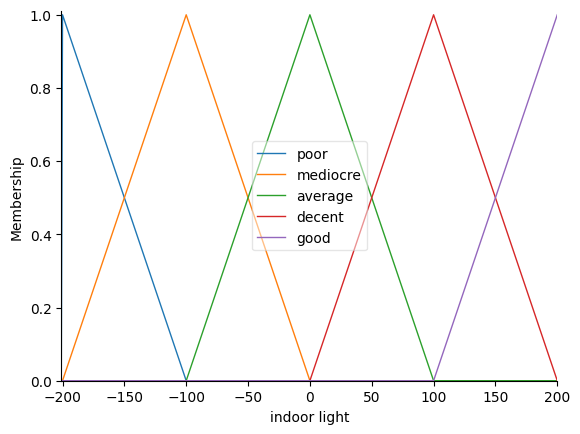

In [14]:
indoor['poor']=fuzz.trimf(indoor.universe,[-200,-200,-100])
indoor['mediocre']=fuzz.trimf(indoor.universe,[-200,-100,0])
indoor['average']=fuzz.trimf(indoor.universe,[-100,0,100])
indoor['decent']=fuzz.trimf(indoor.universe,[0,100,200])
indoor['good']=fuzz.trimf(indoor.universe,[100,200,200])

# EXIBIR GRÁFICO
indoor.view()

### ILUMINAÇÃO EXTERIOR

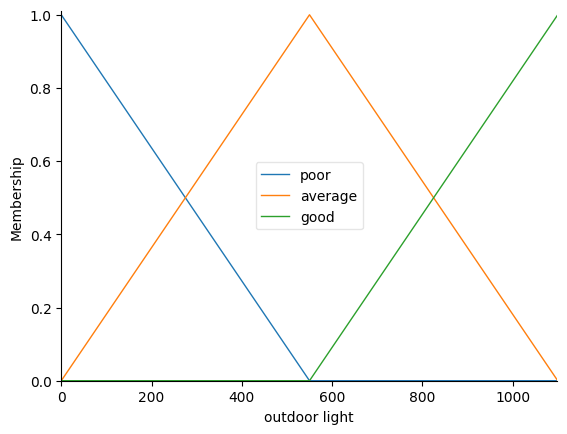

In [15]:
outdoor['poor']=fuzz.trimf(outdoor.universe,[0,0,550])
outdoor['average']=fuzz.trimf(outdoor.universe,[0,550,1100])
outdoor['good']=fuzz.trimf(outdoor.universe,[550,1100,1100])

# EXIBINDO GRÁFICO
outdoor.view()

### TABELA DE PERTENCIMENTO DOS CONSEQUENTES:
### PERSIANAS

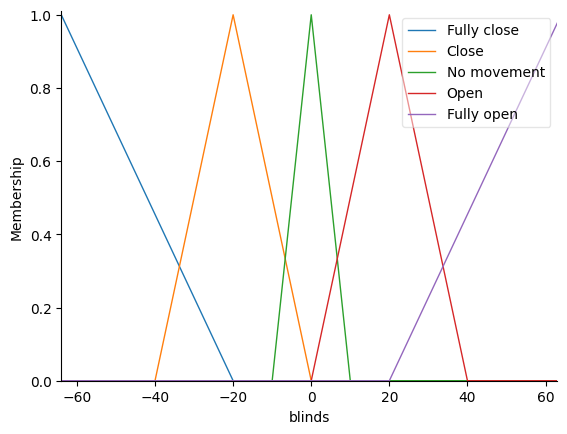

In [4]:
blinds =ctrl.Consequent(np.arange(-64, 64, 1), 'blinds')

blinds['Fully close']=fuzz.trimf(blinds.universe,[-64,-64,-20])
blinds['Close']=fuzz.trimf(blinds.universe,[-40,-20,0])
blinds['No movement']=fuzz.trimf(blinds.universe,[-10,0,10])
blinds['Open']=fuzz.trimf(blinds.universe,[0,20,40])
blinds['Fully open']=fuzz.trimf(blinds.universe,[20,64,64])

# EXIBIR GRÁFICO
blinds.view()

### LAMPADAS (LEDS)

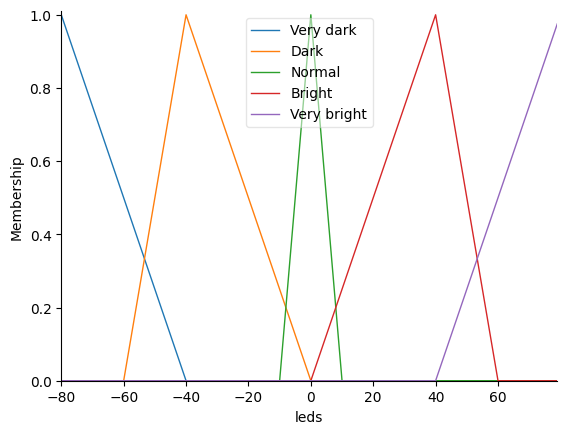

In [16]:
leds = ctrl.Consequent(np.arange(-80,80,1),"leds")

leds["Very dark"] = fuzz.trimf(leds.universe, [-80,-80 ,-40 ])
leds["Dark"] = fuzz.trimf(leds.universe, [-60,-40 ,0 ])
leds["Normal"] = fuzz.trimf(leds.universe, [-10,-0 ,10 ])
leds["Bright"] = fuzz.trimf(leds.universe, [0,40 ,60 ])
leds["Very bright"] = fuzz.trimf(leds.universe, [40, 80, 80])

# EXIBINDO GRÁFICO
leds.view()

## Criando as Regras

In [6]:
#Tabelas de regras: Lâmpadas

regral1=ctrl.Rule(indoor['poor']&outdoor['poor'],leds['Very bright'])
regral2=ctrl.Rule(indoor['poor']&outdoor['average'],leds['Very bright'])
regral3=ctrl.Rule(indoor['poor']&outdoor['good'],leds['Bright'])
regral4=ctrl.Rule(indoor['mediocre']&outdoor['poor'],leds['Very bright'])
regral5=ctrl.Rule(indoor['mediocre']&outdoor['average'],leds['Bright'])
regral6=ctrl.Rule(indoor['mediocre']&outdoor['good'],leds['Bright'])
regral7=ctrl.Rule(indoor['average'],leds['Normal'])
regral8=ctrl.Rule(indoor['decent']&outdoor['poor'],leds['Normal'])
regral9=ctrl.Rule(indoor['decent']&outdoor['average'],leds['Dark'])
regral10=ctrl.Rule(indoor['decent']&outdoor['good'],leds['Very dark'])
regral11=ctrl.Rule(indoor['good']&outdoor['poor'],leds['Dark'])
regral12=ctrl.Rule(indoor['good']&outdoor['average'],leds['Very dark'])
regral13=ctrl.Rule(indoor['good']&outdoor['good'],leds['Very dark'])

In [7]:
leds_ctrl = ctrl.ControlSystem([
    regral1, regral2, regral3,regral4,
    regral5,regral6,regral7,regral8,
    regral9,regral10,regral11,regral12,regral13])

led = ctrl.ControlSystemSimulation(leds_ctrl)

## Testando as regras de pertinência para as lâmpadas

Teste 1 - Led: 47.36%


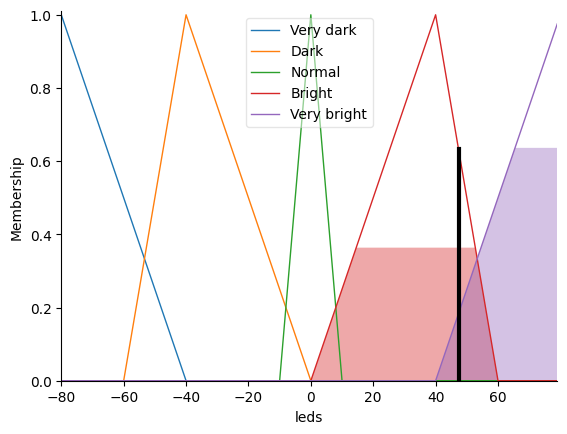

In [8]:
# Teste 1
led.input['indoor light'] = -100
led.input['outdoor light']=200
led.compute()
print (f"Teste 1 - Led: {led.output['leds']:.2f}%")
leds.view(sim=led)

Teste 2 - Led: 33.53%


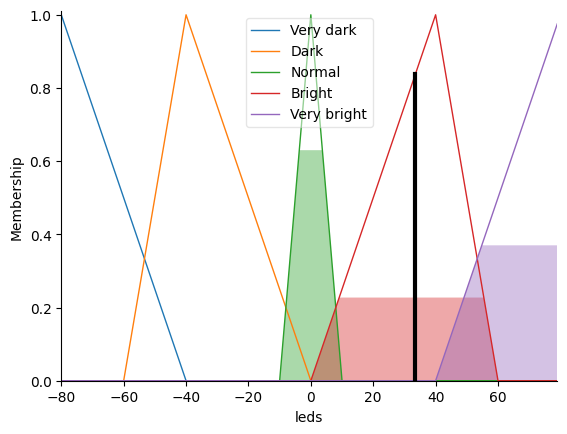

In [9]:
# Teste 2
led.input['indoor light'] = -37
led.input['outdoor light']=125
led.compute()
print (f"Teste 2 - Led: {led.output['leds']:.2f}%")
leds.view(sim=led)